In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pip install xgboost
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,cross_val_score 
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
import pickle


Note: you may need to restart the kernel to use updated packages.


In [2]:
calories=pd.read_csv("calories.csv")
calories.head(10)

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0
5,15130815,123.0
6,19602372,112.0
7,11117088,143.0
8,12132339,134.0
9,17964668,72.0


In [3]:
print(calories.shape)

(15000, 2)


In [4]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [5]:
exercise=pd.read_csv("exercise.csv")


In [6]:
exercise.shape

(15000, 8)

In [7]:
exercise.head(10)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8
5,15130815,female,36,151.0,50.0,23.0,96.0,40.7
6,19602372,female,33,158.0,56.0,22.0,95.0,40.5
7,11117088,male,41,175.0,85.0,25.0,100.0,40.7
8,12132339,male,60,186.0,94.0,21.0,97.0,40.4
9,17964668,female,26,146.0,51.0,16.0,90.0,40.2


In [8]:
cal_data=pd.concat([exercise,calories['Calories']],axis=1)

In [9]:
cal_data.drop(columns = ["User_ID"],axis=1,inplace =True)

In [10]:
cal_data.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


<AxesSubplot:>

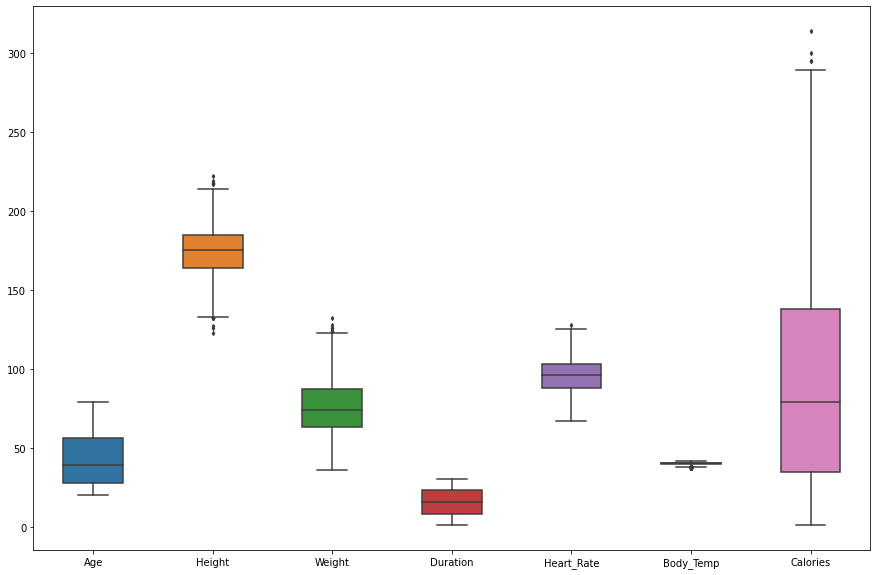

In [11]:
fig,ax = plt.subplots(figsize = (15,10))
sns.boxplot(data=cal_data,width = 0.5,fliersize = 3,ax=ax)

In [12]:
from scipy import stats
attributes_with_outliers = ['Height', 'Weight', 'Calories']

# Function to remove outliers using Z-score
def remove_outliers_zscore(df, attributes):
    for attr in attributes:
        z_scores = stats.zscore(df[attr])
        df = df[(z_scores < 3) & (z_scores > -3)]
    return df

# Remove outliers from specified attributes
cal_data = remove_outliers_zscore(cal_data, attributes_with_outliers)

<AxesSubplot:>

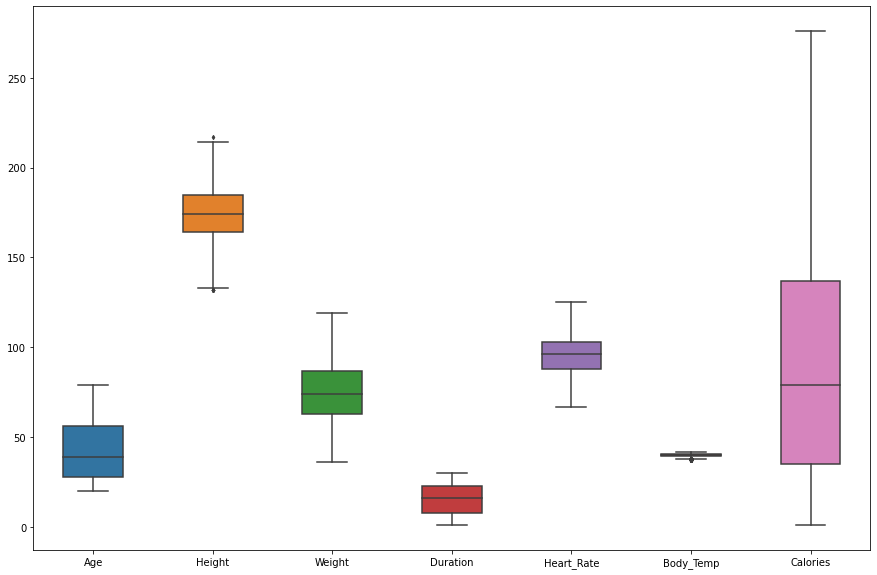

In [13]:
fig,ax = plt.subplots(figsize = (15,10))
sns.boxplot(data=cal_data,width = 0.5,fliersize = 3,ax=ax)

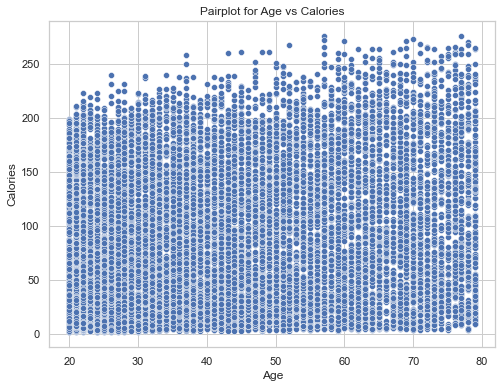

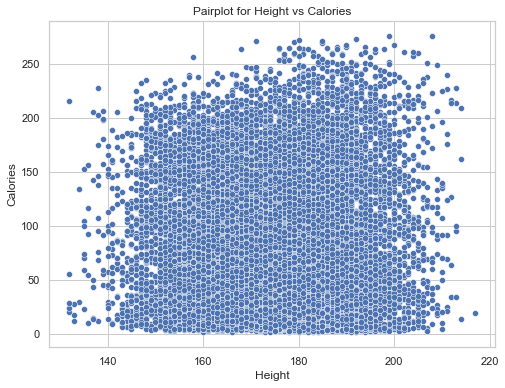

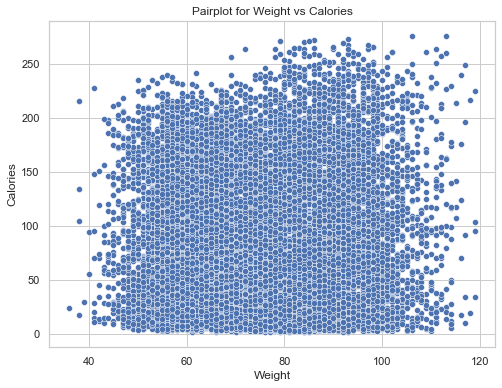

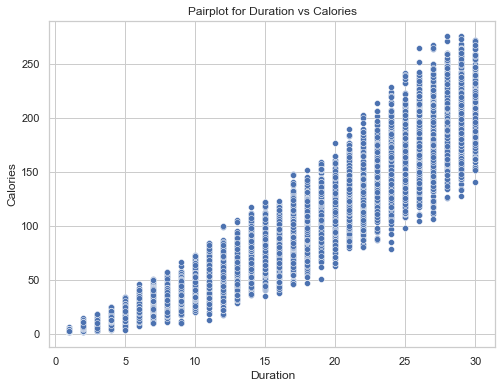

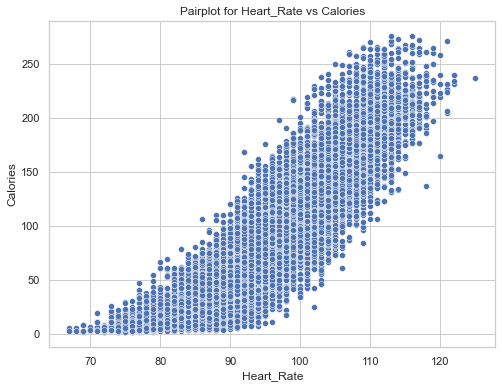

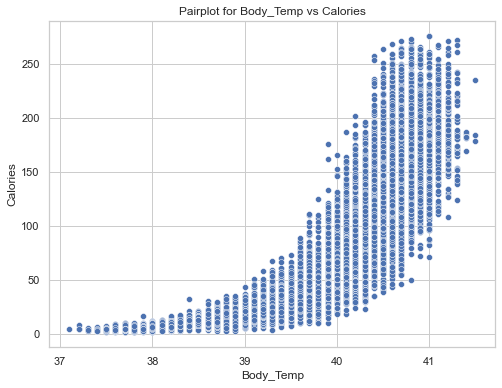

In [14]:
for column in cal_data.columns[1:-1]:  
    sns.set(style="whitegrid")
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=cal_data, x=column, y='Calories')
    plt.title(f'Pairplot for {column} vs Calories')
    plt.show()

In [15]:
cal_data.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [16]:
cal_data.shape

(14975, 8)

In [17]:
cal_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14975 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      14975 non-null  object 
 1   Age         14975 non-null  int64  
 2   Height      14975 non-null  float64
 3   Weight      14975 non-null  float64
 4   Duration    14975 non-null  float64
 5   Heart_Rate  14975 non-null  float64
 6   Body_Temp   14975 non-null  float64
 7   Calories    14975 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 1.0+ MB


In [18]:
cal_data.isnull().sum()

Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

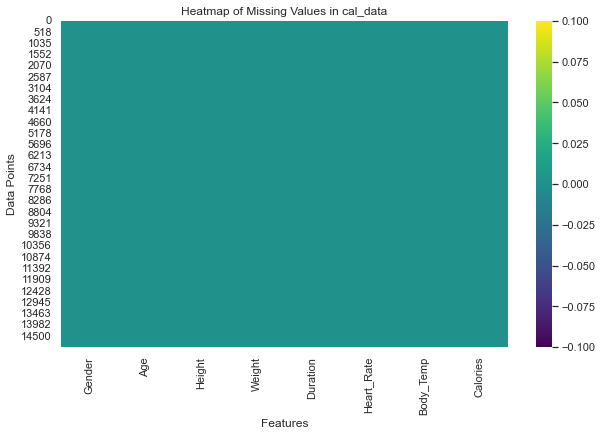

In [19]:
plt.figure(figsize=(10, 6))
sns.heatmap(cal_data.isnull(), cbar=True, cmap='viridis')
plt.title('Heatmap of Missing Values in cal_data')
plt.xlabel('Features')
plt.ylabel('Data Points')
plt.show()

In [20]:
cal_data.notnull()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...
14995,True,True,True,True,True,True,True,True
14996,True,True,True,True,True,True,True,True
14997,True,True,True,True,True,True,True,True
14998,True,True,True,True,True,True,True,True


In [21]:
cal_data.describe()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,14975.000000,14975.000000,14975.000000,14975.000000,14975.000000,14975.000000,14975.000000
mean,42.768347,174.427713,74.916795,15.523005,95.505710,40.024975,89.407679
std,16.971868,14.192634,14.954931,8.315221,9.567386,0.779122,62.271416
min,20.000000,132.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,39.000000,174.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,137.000000
max,79.000000,217.000000,119.000000,30.000000,125.000000,41.500000,276.000000


# Data Visvulization

In [22]:
sns.set()

<AxesSubplot:xlabel='Gender', ylabel='count'>

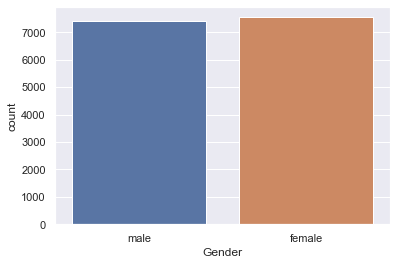

In [23]:
sns.countplot(data=cal_data,x='Gender')

<AxesSubplot:xlabel='Age', ylabel='Density'>

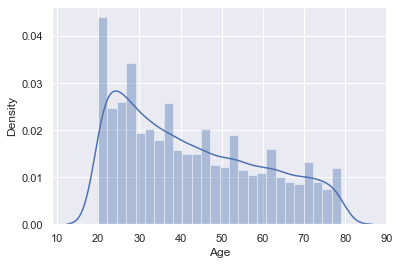

In [24]:
sns.distplot(cal_data['Age'])

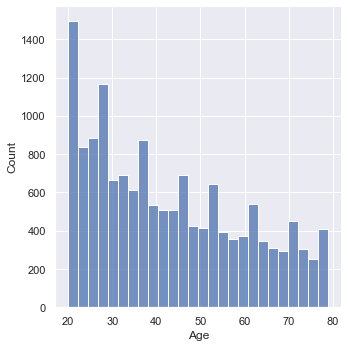

In [25]:
sns.displot(cal_data['Age'])

<AxesSubplot:xlabel='Age', ylabel='Count'>

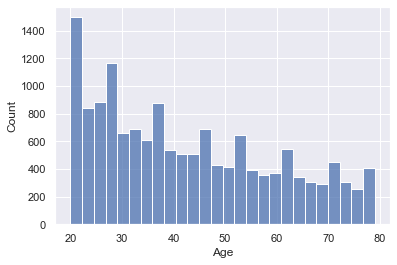

In [26]:
sns.histplot(cal_data['Age'])

<AxesSubplot:xlabel='Height', ylabel='Density'>

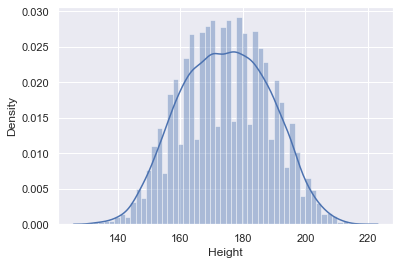

In [27]:
sns.distplot(cal_data['Height'])

<AxesSubplot:xlabel='Weight', ylabel='Density'>

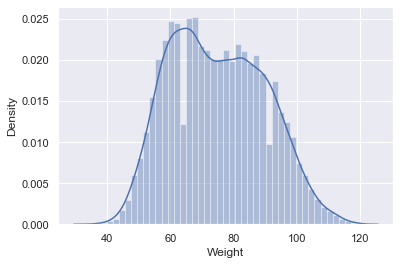

In [28]:
sns.distplot(cal_data['Weight'])

<AxesSubplot:xlabel='Heart_Rate', ylabel='Density'>

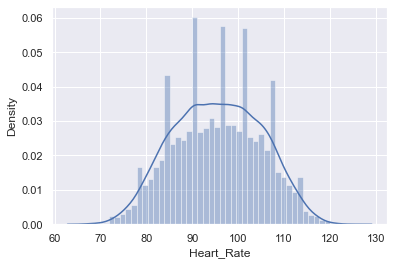

In [29]:
sns.distplot(cal_data['Heart_Rate'])

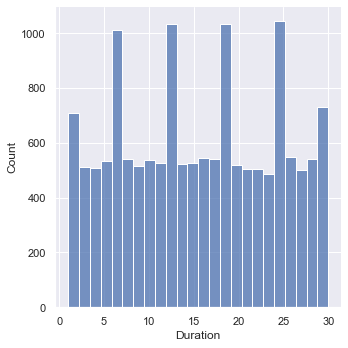

In [30]:
sns.displot(cal_data['Duration'])

In [31]:

cal_data_encoded=pd.get_dummies(cal_data,columns=['Gender'])

In [32]:
corr_matrix=cal_data_encoded.corr()
corr_matrix

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Gender_female,Gender_male
Age,1.000000,0.007771,0.088397,0.011857,0.008517,0.012208,0.152113,-0.002133,0.002133
Height,0.007771,1.000000,0.958248,-0.005161,-0.000407,0.001052,0.015219,-0.710965,0.710965
Weight,0.088397,0.958248,1.000000,-0.002501,0.003258,0.003918,0.032970,-0.784414,0.784414
Duration,0.011857,-0.005161,-0.002501,1.000000,0.852941,0.903144,0.956103,-0.002790,0.002790
Heart_Rate,0.008517,-0.000407,0.003258,0.852941,1.000000,0.771836,0.897708,-0.010472,0.010472
Body_Temp,0.012208,0.001052,0.003918,0.903144,0.771836,1.000000,0.825357,-0.006885,0.006885
Calories,0.152113,0.015219,0.032970,0.956103,0.897708,0.825357,1.000000,-0.020608,0.020608
Gender_female,-0.002133,-0.710965,-0.784414,-0.002790,-0.010472,-0.006885,-0.020608,1.000000,-1.000000
Gender_male,0.002133,0.710965,0.784414,0.002790,0.010472,0.006885,0.020608,-1.000000,1.000000


In [33]:
plt.figure(figsize=(10,10))

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<AxesSubplot:>

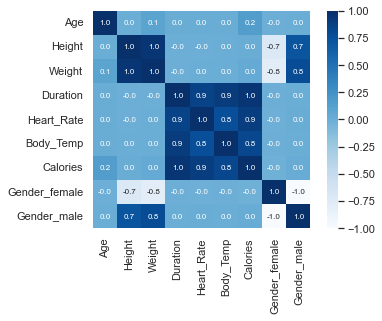

In [34]:
sns.heatmap(corr_matrix,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [35]:
cal_data['Gender'] = pd.Categorical(cal_data['Gender'])
categorical_columns = cal_data.select_dtypes(include=['category']).columns
numeric_columns = cal_data.drop(columns=categorical_columns)
correlation = numeric_columns.corr()

<AxesSubplot:>

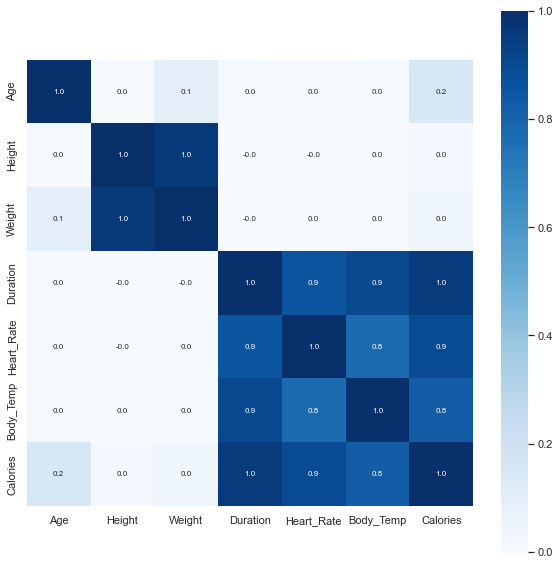

In [36]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [37]:
cal_data.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [38]:
cal_data.replace({'Gender':{'male':0,'female':1}},inplace=True)

In [39]:
cal_data.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [40]:
X=cal_data.drop(columns=['Calories'],axis=1)
Y=cal_data['Calories']

In [41]:
X.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,0,68,190.0,94.0,29.0,105.0,40.8
1,1,20,166.0,60.0,14.0,94.0,40.3
2,0,69,179.0,79.0,5.0,88.0,38.7
3,1,34,179.0,71.0,13.0,100.0,40.5
4,1,27,154.0,58.0,10.0,81.0,39.8


In [42]:
Y.head()

0    231.0
1     66.0
2     26.0
3     71.0
4     35.0
Name: Calories, dtype: float64

In [43]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [44]:
X_train.shape

(11980, 7)

In [45]:
X_test.shape

(2995, 7)

In [46]:
l=[]
def predict(ml_model):
    model=ml_model.fit(X_train,Y_train)
    print('Score : {}'.format(model.score(X_train,Y_train)))
    y_prediction=model.predict(X_test)
    l.append(model)
    print('predictions are: \n {}'.format(y_prediction))
    print('\n')

    r2_score=metrics.r2_score(Y_test,y_prediction)
    print('r2 score: {}'.format(r2_score))

    print('MAE:',metrics.mean_absolute_error(Y_test,y_prediction))
    print('MSE:',metrics.mean_squared_error(Y_test,y_prediction))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test,y_prediction)))
    
    sns.distplot(Y_test)   

    

Score : 0.9678363607863699
predictions are: 
 [177.98036271  37.38101273   7.03417406 ... 100.83685553 166.73294247
 125.57706072]


r2 score: 0.9671513107985772
MAE: 8.36060840729259
MSE: 127.96777285523514
RMSE: 11.312284157288268


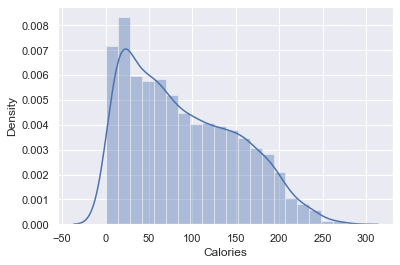

In [47]:
alpha = 1.0  # regularization strength, you can adjust this parameter
ridge_model = Ridge(alpha=alpha)
regression=predict(ridge_model)
regression

Score : 0.9678363656805755
predictions are: 
 [177.9855132   37.37873905   7.04031859 ... 100.83318117 166.73544553
 125.57945601]


r2 score: 0.9671512276323555
MAE: 8.36068683466964
MSE: 127.96809684369342
RMSE: 11.31229847748429


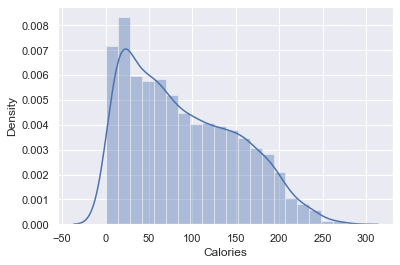

In [48]:
regression = predict(LinearRegression())
regression

Score : 0.9995789933105252
predictions are: 
 [193.12497   30.639194  11.987967 ...  90.79178  160.65724  122.50946 ]


r2 score: 0.9988902680150453
MAE: 1.435674506050219
MSE: 4.323153648844079
RMSE: 2.079219480681171


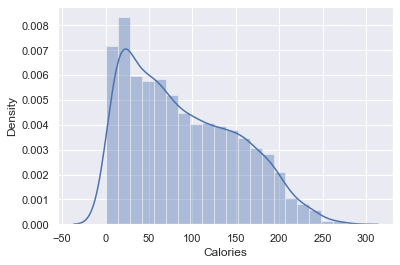

In [49]:
regression = predict(XGBRegressor())
regression


Score : 0.9997025109453261
predictions are: 
 [193.3   29.39  12.21 ...  92.98 161.22 121.71]


r2 score: 0.9978614858145652
MAE: 1.7875425709515862
MSE: 8.330953355592657
RMSE: 2.8863390922746164


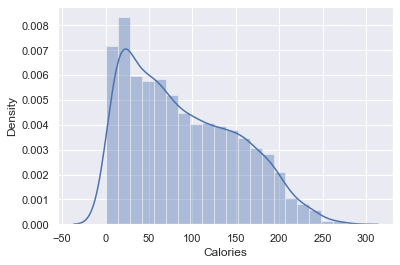

In [50]:
regressor=predict(RandomForestRegressor())
regressor

In [51]:
cv_linear_reg=cross_val_score(LinearRegression(),X,Y,cv=5)
print(f"Cross-validated Linear Regression Accuracy:{cv_linear_reg.mean()*100}")

Cross-validated Linear Regression Accuracy:96.76556011641877


In [52]:
cv_linear_reg=cross_val_score(RandomForestRegressor(),X,Y,cv=5)
print(f"Cross-validated Random Forest Regression Accuracy:{cv_linear_reg.mean()*100}")

Cross-validated Random Forest Regression Accuracy:99.79744609162434


In [53]:
cv_linear_reg=cross_val_score(XGBRegressor(),X,Y,cv=5)
print(f"Cross-validated XGBoost Regression Accuracy:{cv_linear_reg.mean()*100}")

Cross-validated XGBoost Regression Accuracy:99.89026927763199


In [54]:
from sklearn.model_selection import StratifiedKFold
k =10
kf = StratifiedKFold(n_splits=k)
mod1 = cross_val_score(LinearRegression(),X,Y,cv=kf)
print("LinearRegression_accuracy:",mod1.mean()*100)



LinearRegression_accuracy: 96.76760969466699


In [55]:
mod2 = cross_val_score(RandomForestRegressor(),X,Y,cv=kf)
print("RandomForest_accuracy:",mod2.mean()*100)

RandomForest_accuracy: 99.81330311648384


In [56]:
mod3 = cross_val_score(XGBRegressor(),X,Y,cv=kf)
print("XGBoost_accuracy:",mod3.mean()*100)

XGBoost_accuracy: 99.89324895583114


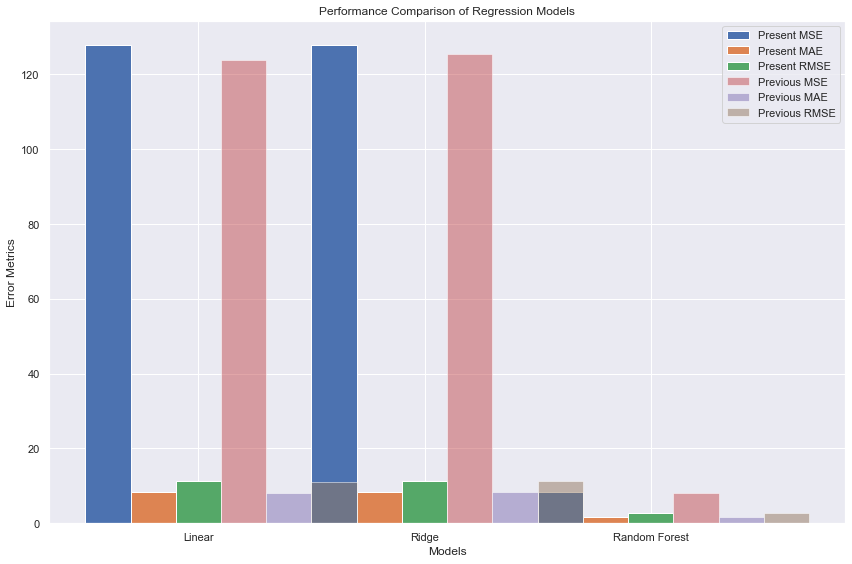

In [57]:
import matplotlib.pyplot as plt
#previous values
models = ['Linear', 'Ridge', 'Random Forest']
mae_values = [8.36,8.36,1.77]  
mse_values = [127.96,127.96,8.26]   
rmse_values = [11.31,11.31,2.87]  

# Previous paper values
paper_mae_values = [8.23, 8.30, 1.81]  
paper_mse_values = [123.97,125.42,8.13]     
paper_rmse_values = [11.13,11.20,2.85]  

# Creating the bar plot
bar_width = 0.2
index = range(len(models))

fig, ax = plt.subplots(figsize=(12, 8))

bar1 = ax.bar(index, mse_values, bar_width, label='Present MSE')
bar2 = ax.bar([i + bar_width for i in index], mae_values, bar_width, label='Present MAE')
bar3 = ax.bar([i + 2 * bar_width for i in index], rmse_values, bar_width, label='Present RMSE')

bar4 = ax.bar([i + 3 * bar_width for i in index], paper_mse_values, bar_width, label='Previous MSE', alpha=0.5)
bar5 = ax.bar([i + 4 * bar_width for i in index], paper_mae_values, bar_width, label='Previous MAE', alpha=0.5)
bar6 = ax.bar([i + 5 * bar_width for i in index], paper_rmse_values, bar_width, label='Previous RMSE', alpha=0.5)

ax.set_xlabel('Models')
ax.set_ylabel('Error Metrics')
ax.set_title('Performance Comparison of Regression Models')
ax.set_xticks([i + 2 * bar_width for i in index])
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()

In [58]:
l

[Ridge(),
 LinearRegression(),
 XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...),
 RandomForestRegressor()]

In [59]:
l[2]

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [60]:
import joblib
joblib.dump(l[2], "mymodel.pkl")
model = joblib.load('mymodel.pkl' )
print()
model.predict([[0,68,198.0,90.0,29.0,105.0,40.3]])[0]

230.52225

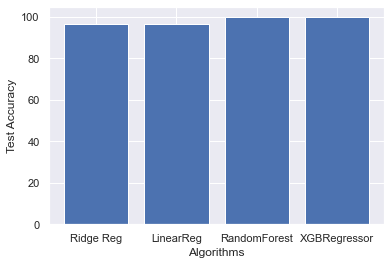

In [61]:
plt.bar(['Ridge Reg','LinearReg','RandomForest','XGBRegressor'],[96.78,96.76,99.81,99.89])
plt.xlabel('Algorithms')
plt.ylabel('Test Accuracy')
plt.show()

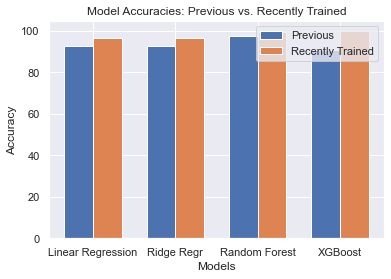

In [62]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
model_names = ['Linear Regression','Ridge Regr' ,'Random Forest', 'XGBoost']

# Final accuracies from previous 
previous_accuracies = [92.88,92.82, 97.5, 90.85]  

# Recently trained accuracies
recent_accuracies = [96.75,96.78, 99.72, 99.88]  

# Plotting
bar_width = 0.35
index = np.arange(len(model_names))

plt.bar(index, previous_accuracies, width=bar_width, label='Previous')
plt.bar(index + bar_width, recent_accuracies, width=bar_width, label='Recently Trained')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracies: Previous vs. Recently Trained')
plt.xticks(index + 0.5*bar_width, model_names)
plt.legend()

plt.show()
